In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import wrning
import warnings
warnings.filterwarnings("ignore")

#Load gold price dataset from 1950 to 2020

In [ ]:
df=pd.read_csv("/content/gold_monthly_csv.csv")

In [ ]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
#check out tail dataset
df.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [ ]:
#shape of dataset
df.shape

(847, 2)

In [ ]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [ ]:
#convert datae column in the date type
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#make date column as index
df.set_index('Date',inplace=True)

In [ ]:
#check out data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 1950-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   847 non-null    float64
dtypes: float64(1)
memory usage: 13.2 KB


#copy data for data lose in df2

In [ ]:
df2=df.copy()

#EDA(Explotary data Analysis):-

In [ ]:
#check the null value in dataset
df.isnull().sum().any()

False

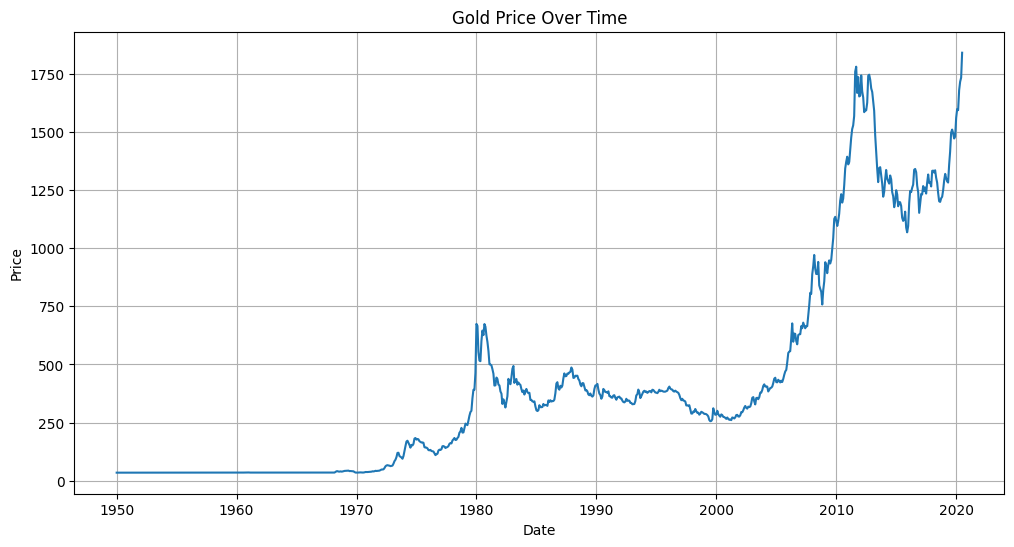

In [ ]:
#now plot the dataset in line plot
plt.figure(figsize=(12,6))
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.title('Gold Price Over Time')
plt.show()

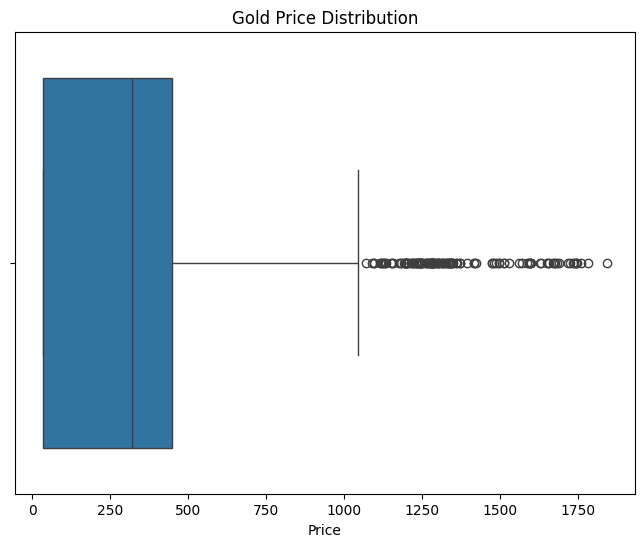

In [ ]:
#boxplot of price distibution of outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price'])
plt.xlabel('Price')
plt.title('Gold Price Distribution')
plt.show()

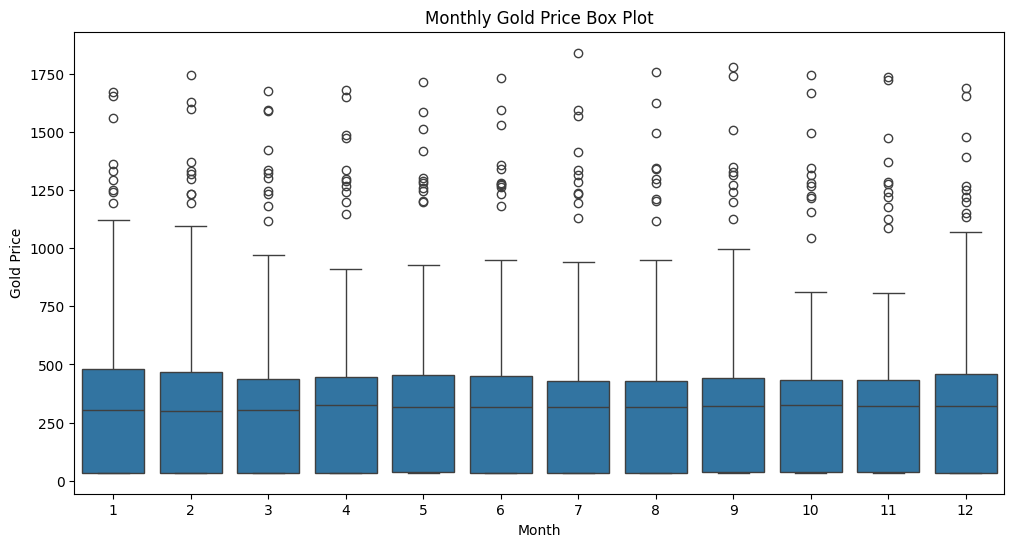

In [ ]:
#box plot month wise
plt.figure(figsize=(12,6))
sns.boxplot(x=df.index.month,y=df['Price'])
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.title('Monthly Gold Price Box Plot')
plt.show()

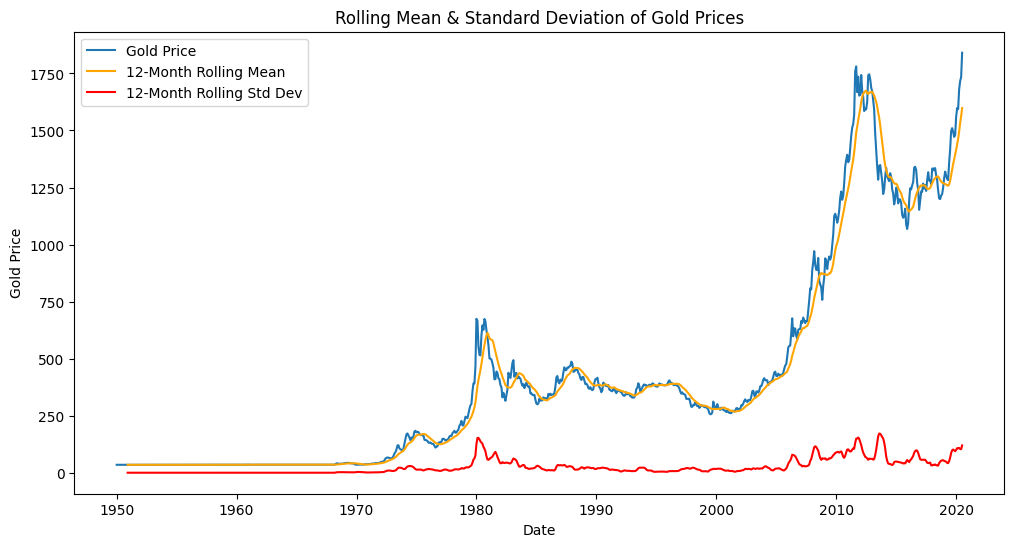

In [ ]:
# Rolling statistics
df2['Rolling_Mean'] = df2['Price'].rolling(window=12).mean()  # 12 months moving average
df2['Rolling_Std'] = df2['Price'].rolling(window=12).std()

# Plot rolling mean and standard deviation
plt.figure(figsize=(12,6))
plt.plot(df2['Price'], label='Gold Price')
plt.plot(df2['Rolling_Mean'], label='12-Month Rolling Mean', color='orange')
plt.plot(df2['Rolling_Std'], label='12-Month Rolling Std Dev', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Rolling Mean & Standard Deviation of Gold Prices')
plt.legend()
plt.show()


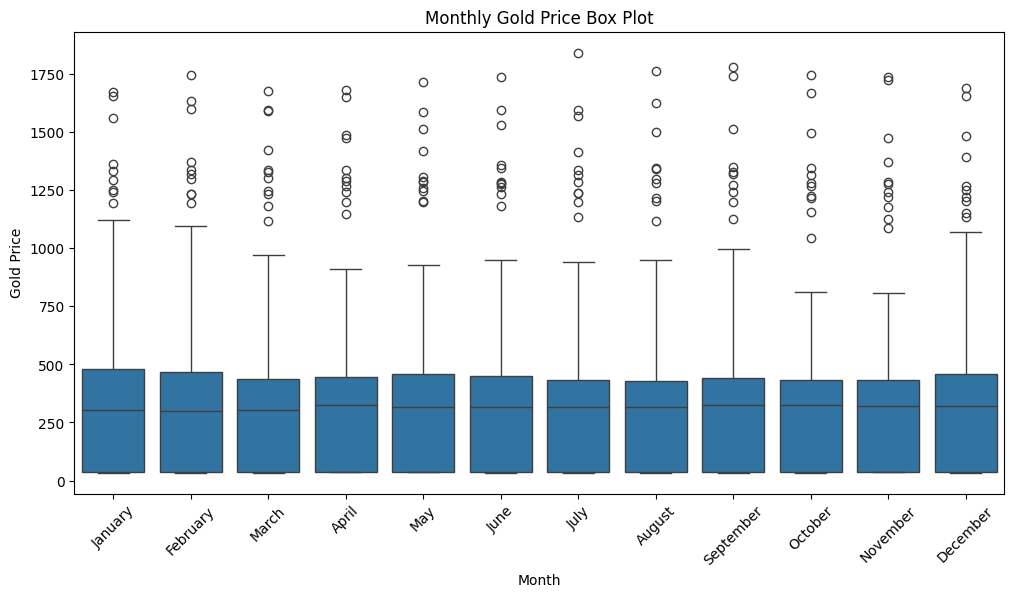

In [ ]:
# Convert the index to month names
df2['Month'] = df2.index.strftime('%B')  # Add a new column with full month names

# Create the month order
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 'October',
               'November', 'December']

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Price', data=df2, order=month_order)
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.title('Monthly Gold Price Box Plot')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#average gold price per decade
df_decade_Avg=df.resample('10Y').mean()
#'10Y' Meaning:'10': Indicates the length of the time period, in this case, every 10 years.'Y': Stands for Yearly frequency
df_decade_Avg

,Price
Date,
1950-12-31,34.729167
1960-12-31,34.965000
1970-12-31,36.165525
1980-12-31,190.235583
1990-12-31,395.518183
2000-12-31,340.542975
2010-12-31,617.174042
2020-12-31,1379.606887


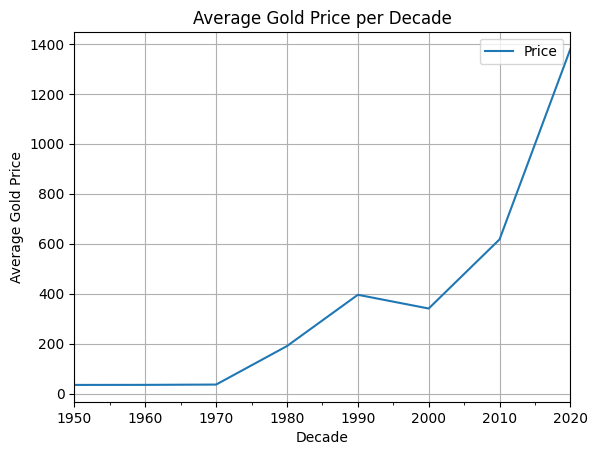

In [ ]:
#plot the decade dataset
df_decade_Avg.plot(kind='line')
plt.xlabel('Decade')
plt.ylabel('Average Gold Price')
plt.title('Average Gold Price per Decade')
plt.grid(True)
plt.show()

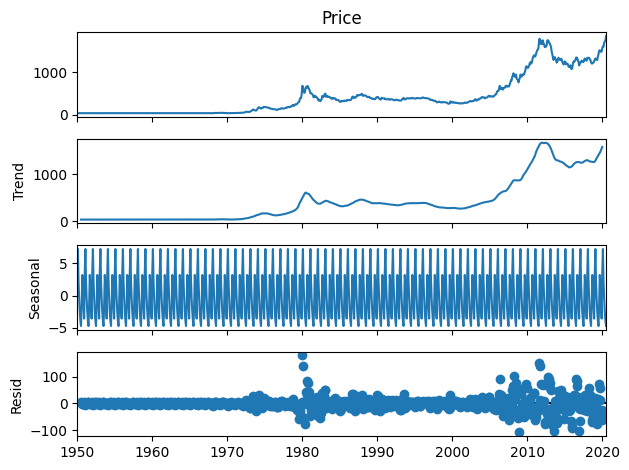

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series on the price
decomposition = seasonal_decompose(df['Price'], model='additive', period=12)
decomposition.plot()
plt.show()

#split the dataset in train and test dataset

In [ ]:
train_size=int(len(df)*0.8)
train=df[:train_size]
test=df[train_size:]

In [ ]:
#check the train datashape and test data
print(f"Shape of train data:-",train.shape)
print(f"Shape of test data:-",test.shape)

Shape of train data:- (677, 1)
Shape of test data:- (170, 1)


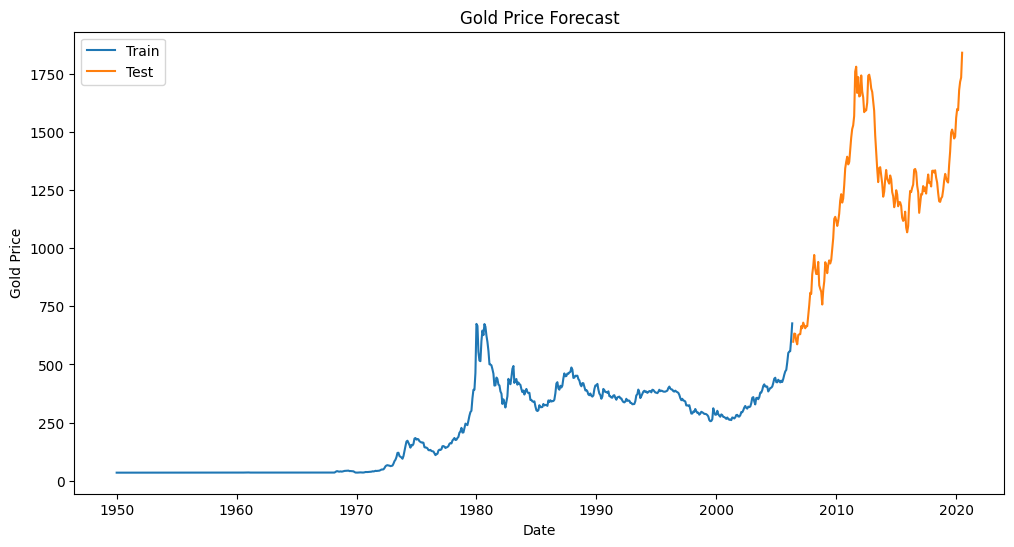

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecast')
plt.legend()
plt.show()

In [ ]:
# Create a 'Time' variable representing the index in terms of integers (for the linear regression model)
train['Time'] = np.arange(len(train))
test['Time'] = np.arange(len(train), len(df))

#Build the model

In [ ]:
model=LinearRegression()
model.fit(train[['Time']], train['Price'].values)

LinearRegression()

In [ ]:
predictions_model=model.predict(test[['Time']])
test['forecast']=predictions_model

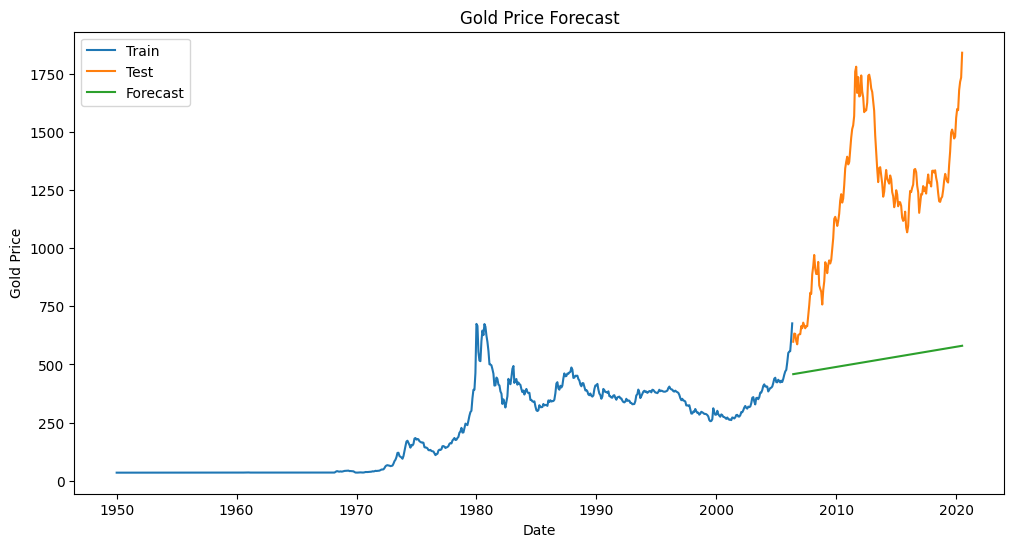

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(test['forecast'],label='Forecast')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecast')
plt.legend()
plt.show()

In [ ]:
#create function find mean  between actual and prerdicted data
def mape(actual, predicted):
    return round(np.mean(np.abs((actual - predicted) / actual)) * 100,2)

In [ ]:
#actual data use test price and predicted data use test forecast using mape() that we created above
mape_model_test=mape(test['Price'].values,test['forecast'].values)
print(f"MAPE of model:-",mape_model_test,'%')

MAPE of model:- 54.92 %


In [ ]:
results=pd.DataFrame({'test mape(%)':[mape_model_test]},index=['RegressionOnTime'])
results.head()

,test mape(%)
RegressionOnTime,54.92


In [ ]:
naive_train=train.copy()
naive_test=test.copy()

In [ ]:
naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test['naive'].head()

,naive
Date,
2006-06-01,676.769
2006-07-01,676.769
2006-08-01,676.769
2006-09-01,676.769
2006-10-01,676.769


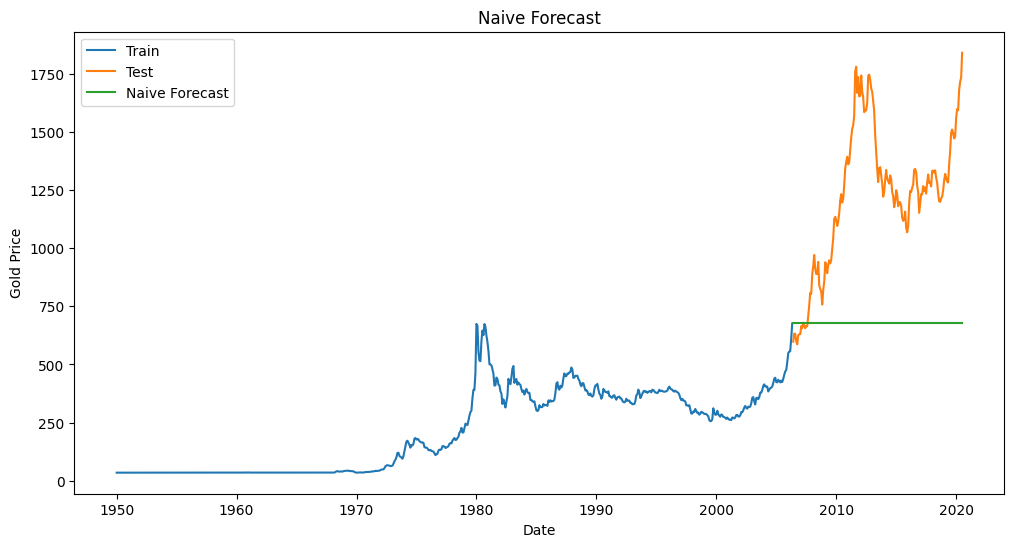

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(naive_train['Price'],label='Train')
plt.plot(naive_test['Price'],label='Test')
plt.plot(naive_test['naive'],label='Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Naive Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
final_model=ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=0.5,smoothing_trend=0.3,smoothing_seasonal=0.5)

In [ ]:
mape_model_test=mape(df['Price'].values,final_model.fittedvalues)
print(f"MAPE of model:-",mape_model_test,'%')

MAPE of model:- 8.7 %


In [ ]:
predictions=final_model.forecast(steps=len(test))

In [ ]:
pred_df=pd.DataFrame({'lower_ci':round(predictions-1.96*np.std(final_model.resid,ddof=1),2),
                      'predictions':round(predictions,2),
                      'upper_ci':round(predictions+1.96*np.std(final_model.resid,ddof=1),2)})
pred_df.head()

,lower_ci,predictions,upper_ci
2020-08-01,1756.60,1830.83,1905.07
2020-09-01,1767.64,1841.88,1916.11
2020-10-01,1786.11,1860.35,1934.58
2020-11-01,1819.46,1893.69,1967.93
2020-12-01,1879.66,1953.90,2028.13


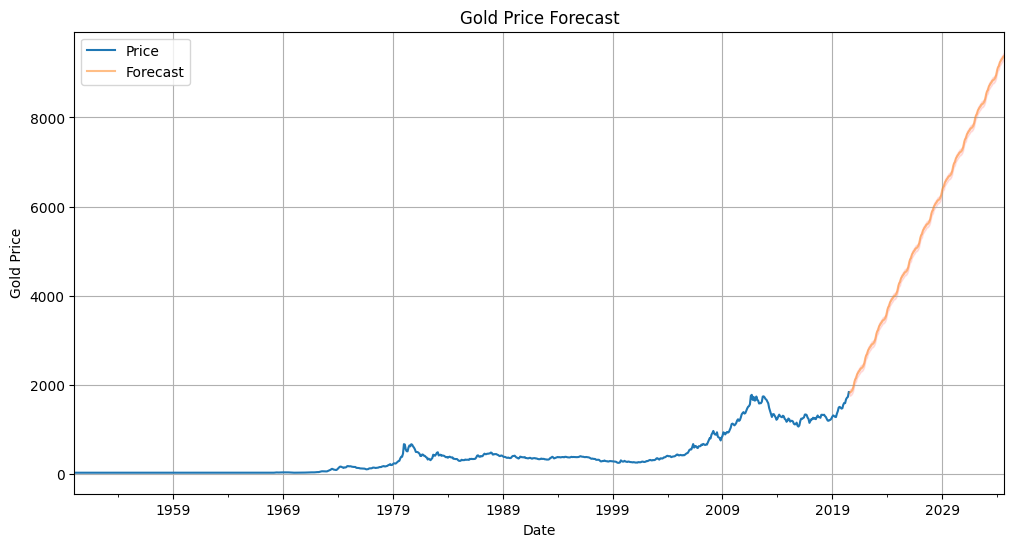

In [ ]:
axis=df.plot(label='Actual',figsize=(12,6))
pred_df['predictions'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_ci'],pred_df['upper_ci'],color='r',alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Forecast')
plt.grid()
plt.legend()
plt.show()